<h1>Star Wars Survey</h1>
<h1>Objective:</h1><br>
While waiting for <a href="https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens">Star Wars: The Force Awakens</a> to come out, the team at <a href="http://fivethirtyeight.com/">FiveThirtyEight</a> became interested in answering some questions about <i>Star Wars</i> fans.<br><br>
Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?<br><br>
The team used an online tool called SurveyMonkey and received 835 total responses from fans.<br><br>
Dataset found <a href="https://github.com/fivethirtyeight/data/tree/master/star-wars-survey">here</a>.<br>


In [1]:
# we specify ISO-8859-1 encoding because some characters aren't in Python's utf-8 default encoding
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

A few important column names and their descriptions:
<ul>
<li><b>RespondentID</b> - An anonymized ID for the respondent (person taking the survey)</li>
<li><b>Gender</b> - The respondent's gender</li>
<li><b>Age</b> - The respondent's age</li>
<li><b>Household Income</b> - The respondent's income</li>
<li><b>Education</b> - The respondent's education level</li>
<li><b>Location (Census Region)</b> - The respondent's location</li>
<li><b>Have you seen any of the 6 films in the Star Wars franchise?</b> - Has a <b>Yes</b> or <b>No</b> response</li>
<li><b>Do you consider yourself to be a fan of the Star Wars film franchise?</b> - Has a <b>Yes</b> or <b>No</b> response</li>
</ul><br>
There are Unnamed columns but we will deal with those later.<br>
Right now, we need to remove rows with invalid RespondentID responses such as NaN.<br>

In [4]:
# filtering out NaN values from star_wars dataset
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

The two columns:
<ul>
<li>Have you seen any of the 6 films in the Star Wars franchise?</li>
<li>Do you consider yourself to be a fan of the Star Wars film franchise?</li>
</ul><br>
Supposedly contain only Yes/No values.<br>
We do a value count to see if there are any other values in those columns.

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We transform the Yes/No values to True/False.<br>
That way, it'll be much easier to work with the dataset since we will do boolean comparison instead of string comparison.

In [7]:
cols = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
]
yes_no = {
    'Yes': True,
    'No' : False
}

for c in cols:
    star_wars[c] = star_wars[c].map(yes_no)

In [8]:
# checking to see if values have changed to boolean values
# Yes = 936, No = 250
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
# Yes = 552, No = 284
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question and the respondent checked off a series of boxes in response to the question:<br>
<b>Which of the following Star Wars films have you seen? Please select all that apply.</b><br><br>
The columns for this question are:
<ul>
<li><b>Which of the following Star Wars films have you seen? Please select all that apply.</b> - Whether or not the respondent saw <i>Star Wars: Episode I The Phantom Menace</i>.</li>
<li><b>Unnamed: 4</b> - Whether or not the respondent saw <i>Star Wars: Episode II Attack of the Clones</i>.</li>
<li><b>Unnamed: 5</b> - Whether or not the respondent saw <i>Star Wars: Episode III Revenge of the Sith</i>.</li>
<li><b>Unnamed: 6</b> - Whether or not the respondent saw <i>Star Wars: Episode IV A New Hope</i>.</li>
<li><b>Unnamed: 7</b> - Whether or not the respondent saw <i>Star Wars: Episode V The Empire Strikes Back</i>.</li>
<li><b>Unnamed: 8</b> - Whether or not the respondent saw <i>Star Wars: Episode VI Return of the Jedi</i>.</li>
</ul><br>
If the value in a cell is the name of the movie, that means the respondent saw the movie.<br>
If the value is NaN, we will assume they didn't see the movie.<br>
We convert the values to True/False:<br><br>
<b>True</b> - respondent saw the movie<br>
<b>False</b> - respondent did not see the movie<br><br>
For example:<br>
<i>Star Wars: Episode I The Phantom Menace</i> values become <b>True</b>.<br>
<i>NaN</i> values become <b>False</b>.<br><br>
We also changed column names to make it easier for us to work with:
<ul>
<li><i>Star Wars: Episode I The Phantom Menace</i>: seen_1</li>
<li><i>Star Wars: Episode II Attack of the Clones</i>: seen_2</li>
<li><i>Star Wars: Episode III Revenge of the Sith</i>: seen_3</li>
<li><i>Star Wars: Episode IV A New Hope</i>: seen_4</li>
<li><i>Star Wars: Episode V The Empire Strikes Back</i>: seen_5</li>
<li><i>Star Wars: Episode VI Return of the Jedi</i>: seen_6</li>
</ul>

In [10]:
# converting column names to seen_#
count = 1
for c in star_wars.columns[3:9]:
    star_wars = star_wars.rename(columns={
        c : "seen_" + str(count)
    })
    count += 1
        
print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


In [11]:
import numpy as np

# dictionary for mapping/renaming
sw_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(sw_map)

In [12]:
# checking to see if values have been converted
star_wars['seen_1'].value_counts()

True     673
False    513
Name: seen_1, dtype: int64

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. <b>1</b> means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value <b>1</b>, <b>2</b>, <b>3</b>, <b>4</b>, <b>5</b>, <b>6</b>, or <b>NaN</b>:
<ul>
<li><b>Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.</b> - How much the respondent liked <i>Star Wars: Episode I The Phantom Menace</i></li>
<li><b>Unnamed: 10</b> - How much the respondent liked <i>Star Wars: Episode II Attack of the Clones</i></li>
<li><b>Unnamed: 11</b> - How much the respondent liked <i>Star Wars: Episode III Revenge of the Sith</i></li>
<li><b>Unnamed: 12</b> - How much the respondent liked <i>Star Wars: Episode IV A New Hope</i></li>
<li><b>Unnamed: 13</b> - How much the respondent liked <i>Star Wars: Episode V The Empire Strikes Back</i></li>
<li><b>Unnamed: 14</b> - How much the respondent liked <i>Star Wars: Episode VI Return of the Jedi</i></li>
</ul>
<br>
Similar to above, we change column names and convert values to floats:
<ul>
<li><i>Star Wars: Episode I The Phantom Menace</i>: ranking_1</li>
<li><i>Star Wars: Episode II Attack of the Clones</i>: ranking_2</li>
<li><i>Star Wars: Episode III Revenge of the Sith</i>: ranking_3</li>
<li><i>Star Wars: Episode IV A New Hope</i>: ranking_4</li>
<li><i>Star Wars: Episode V The Empire Strikes Back</i>: ranking_5</li>
<li><i>Star Wars: Episode VI Return of the Jedi</i>: ranking_6</li>
</ul>

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [14]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

Taking the mean of each ranking column can help us find the highest-ranked (lower average means higher ranked) movie faster.

In [88]:
print("Ranking:")
star_wars[star_wars.columns[9:15]].mean().sort_values()

Ranking:


ranking_5    2.513158
ranking_6    3.047847
ranking_4    3.272727
ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
dtype: float64

The movie rankings, according to respondents, are:
<ol>
<li>Star Wars: Episode V The Empire Strikes Back</li>
<li>Star Wars: Episode VI Return of the Jedi</li>
<li>Star Wars: Episode IV A New Hope</li>
<li>Star Wars: Episode I The Phantom Menace</li>
<li>Star Wars: Episode II Attack of the Clones</li>
<li>Star Wars: Episode III Revenge of the Sith</li>
</ol>

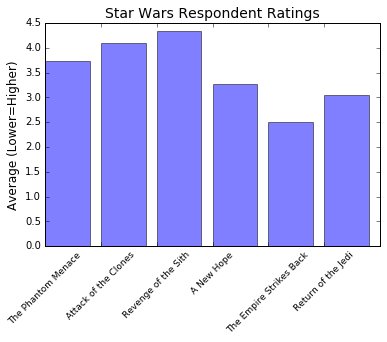

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

mean = star_wars[star_wars.columns[9:15]].mean()

labels = (
    'The Phantom Menace',
    'Attack of the Clones',
    'Revenge of the Sith',
    'A New Hope',
    'The Empire Strikes Back',
    'Return of the Jedi'
)

ypos = np.arange(len(labels))
plt.bar(ypos, mean, alpha=0.5)
plt.xticks(ypos, labels, rotation=45, fontsize=9)
plt.ylabel('Average (Lower=Higher)', fontsize=12)
plt.title('Star Wars Respondent Ratings', fontsize=14)
plt.show()

Now we will create a bar chart to visualize how many people have seen each movie:

In [17]:
# amount of respondents who have seen each movie
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

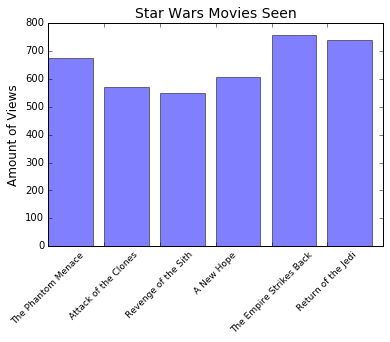

In [155]:
seen_sums = star_wars[star_wars.columns[3:9]].sum()

plt.bar(ypos, seen_sums, alpha=0.5)
plt.xticks(ypos, labels, rotation=45, fontsize=9)
plt.ylabel("Amount of Views", fontsize=12)
plt.title('Star Wars Movies Seen', fontsize=14)

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.<br>
Next, we show the mean and sum of people (separated by gender) that have seen the movies.

In [19]:
# split into two genders
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

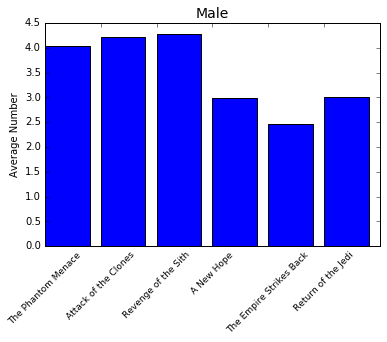

In [157]:
# mean of males who have seen each movie
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.title('Male', fontsize=14)
plt.xticks(ypos, labels, rotation=45, fontsize=9)
plt.ylabel('Average Number')
plt.show()

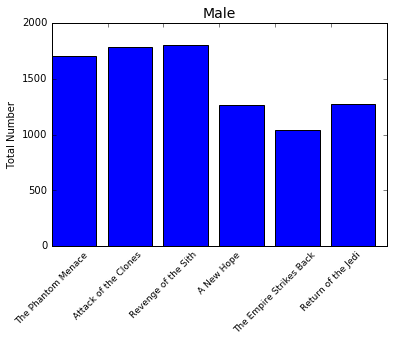

In [161]:
# sum of males who have seen each movie
plt.bar(range(6), males[males.columns[9:15]].sum())
plt.title('Male', fontsize=14)
plt.xticks(ypos, labels, rotation=45, fontsize=9)
plt.ylabel('Total Number')
plt.show()

Male respondents enjoyed the newer Star Wars movies more than the original.

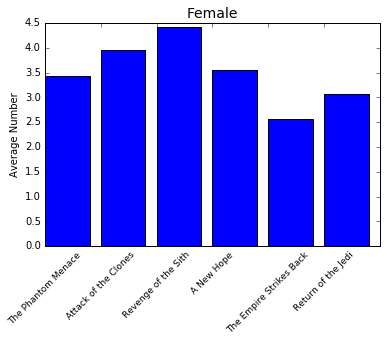

In [158]:
# mean of females who have seen each movie
plt.bar(range(6), females[females.columns[9:15]].mean())
plt.title('Female', fontsize=14)
plt.xticks(ypos, labels, rotation=45, fontsize=9)
plt.ylabel('Average Number')
plt.show()

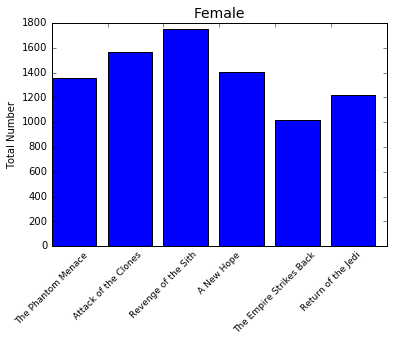

In [162]:
# sum of females who have seen each movie
plt.bar(range(6), females[females.columns[9:15]].sum())
plt.title('Female', fontsize=14)
plt.xticks(ypos, labels, rotation=45, fontsize=9)
plt.ylabel('Total Number')
plt.show()

Female respondents enjoyed newer movies more than males did.